## Step 1: Data Loading and Inspection

In [2]:
# Necessary Librariees
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Function for data loading and representation
def load_and_represent(file_name):
    data = pd.read_csv(file_name)  # Load the data
    display(data.head())           # View first rows
    print(data.info())             # Summary of dataset like columns and dtypes
    display(data.describe())       # Statistical summary 
    return data

In [4]:
data = load_and_represent('WA_Fn-UseC_-Telco-Customer-Churn.csv')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- This reveals the number of rows/columns, data types, and memory usage. In this dataset, you might see 7043 rows and 20 columns.

In [6]:
# Function for data inspection
def data_inspection(data):
     # Convert TotalCharges from object to numeric 
    data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
    print(f'Missing Values:\n{data.isna().sum()}\n')         # Check for missing values
    data = data.dropna()                                     # Remove null values
    print(f'Missing Values after treatment:\n{data.isna().sum()}\n') 
    print(f'Duplicate Values: {data.duplicated().sum()}')    # Check for duplicate values
   
    numerical_columns = data.select_dtypes(include = np.number).columns   # Extract numerical columns only
    melted_data = data[numerical_columns].melt(var_name = 'Feature', value_name = 'Value') # Melt for multiple checking
    sns.boxplot(data=melted_data, x='Feature', y='Value')   # Box plot for visualization
    plt.title("Check for Outliers", loc='right')
    plt.show()

    return data


Missing Values:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Missing Values after treatment:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn          

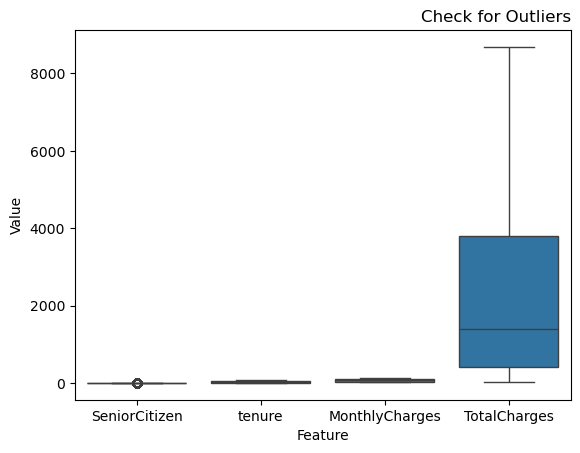

In [7]:
clean_data = data_inspection(data)

- As we can see our data is already clean. Null and duplicate values count is zero (0).
- As we can see there is no major outliers.

In [9]:
# Examine the target distribution
print(clean_data['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


- This shows how many customers Yes vs No churn. Often the dataset is imbalanced because only few percent customers have churned. An imbalanced target means we may  later consider resampling or class weights.

## Step 2: Exploratory Data Analysis (EDA) and Visualization

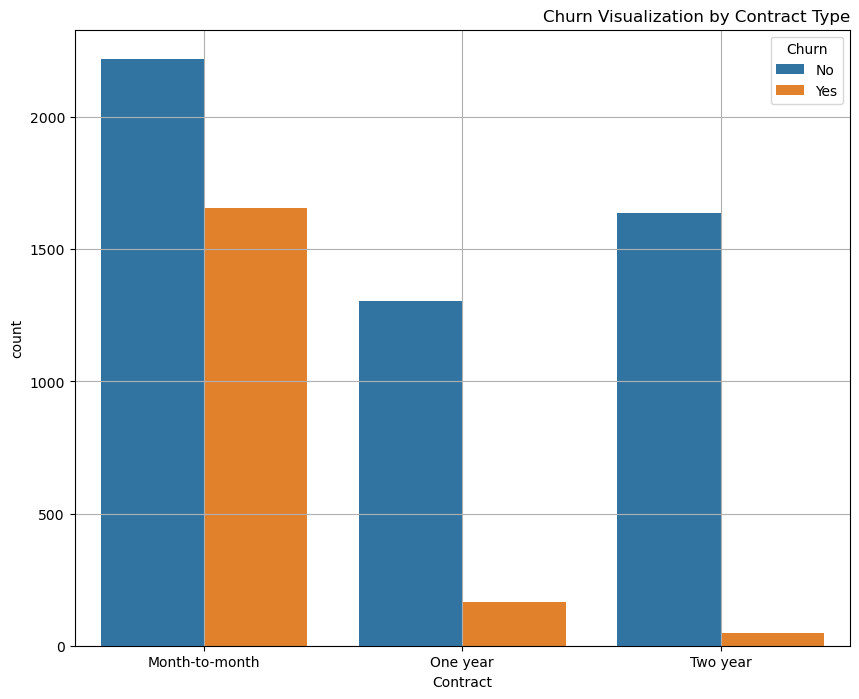

In [12]:
# Count of churn by contract type
plt.figure(figsize=(10,8))
sns.countplot(data=clean_data, x='Contract', hue='Churn')
plt.title("Churn Visualization by Contract Type", loc='right')
plt.grid(True)
plt.show()

- As we can see the count of customers churn or not by contract type.
- High count of customers who are churn is in month-to-month contract.

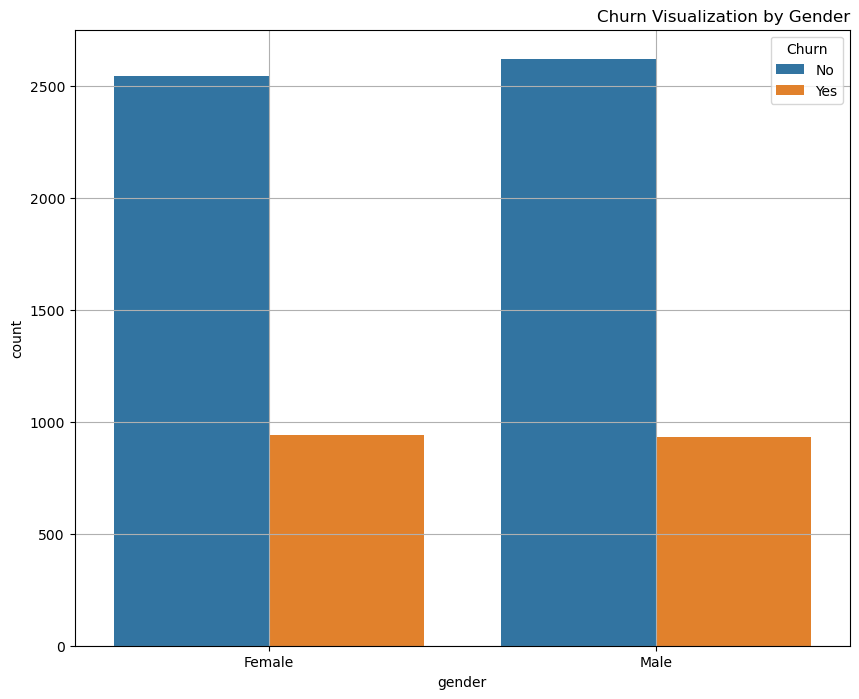

In [14]:
# Count of churn by gender
plt.figure(figsize=(10,8))
sns.countplot(data=clean_data, x='gender', hue='Churn')
plt.title("Churn Visualization by Gender", loc='right')
plt.grid(True)
plt.show()

- Count of churn approximately same for male and female.

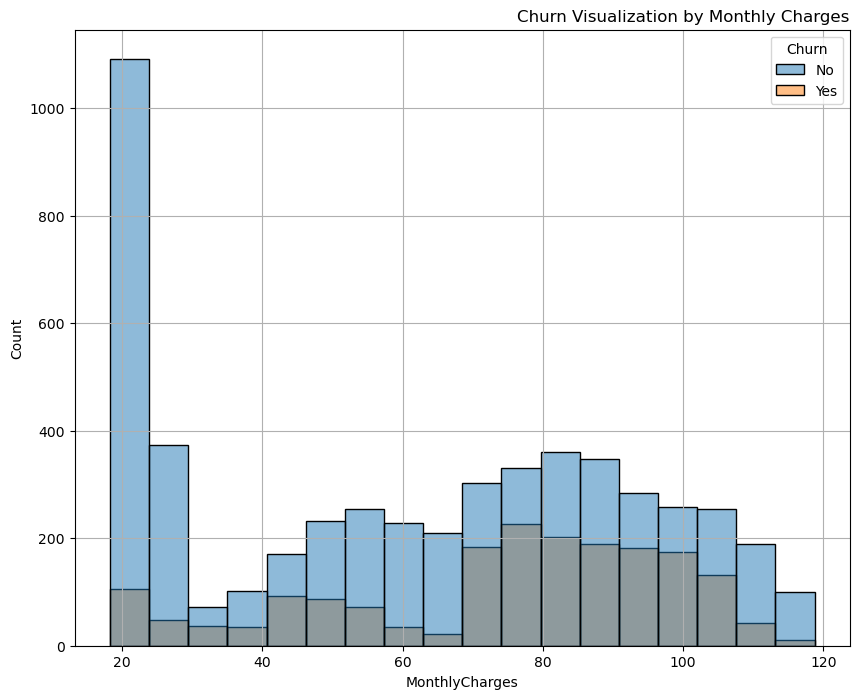

In [16]:
# Count of churn by monthly charges
plt.figure(figsize=(10,8))
sns.histplot(data=clean_data, x='MonthlyCharges', hue='Churn')
plt.title("Churn Visualization by Monthly Charges", loc='right')
plt.grid(True)
plt.show()

- As we can see count of customers who have higher charges was churn more with compare to lower charges customers.

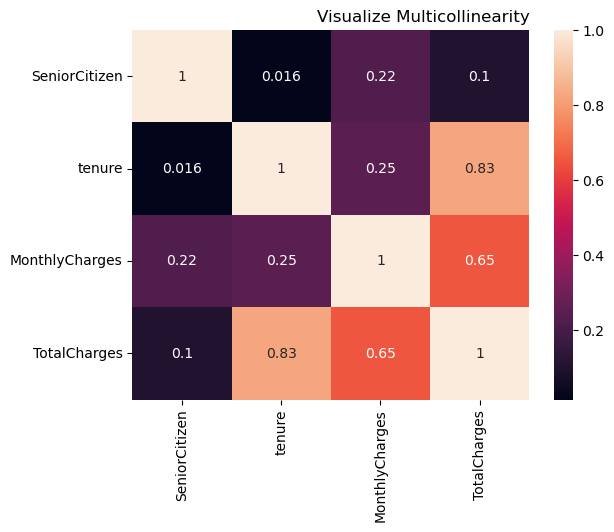

In [18]:
# Heatmap for numeric variables. It helps to identify multicollinearity
numerical_columns = clean_data.select_dtypes(include = np.number)
sns.heatmap(numerical_columns.corr(), annot=True)
plt.title("Visualize Multicollinearity", loc='right')
plt.show()

- As we can see tenure shows multicollinearity with TotalCharges. No major isuues.

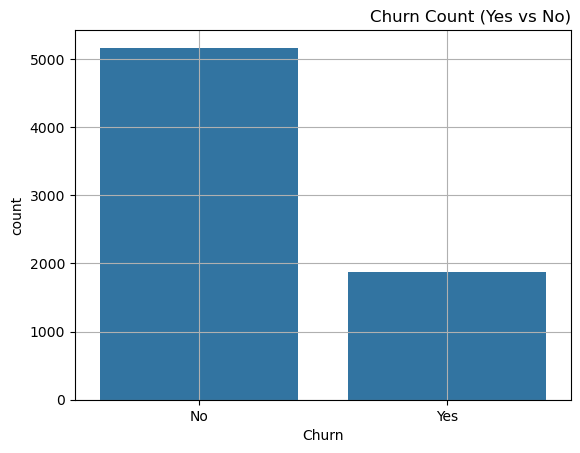

In [45]:
# Churn count 
sns.countplot(x='Churn', data=clean_data)
plt.title("Churn Count (Yes vs No)", loc='right')
plt.grid(True)
plt.show()

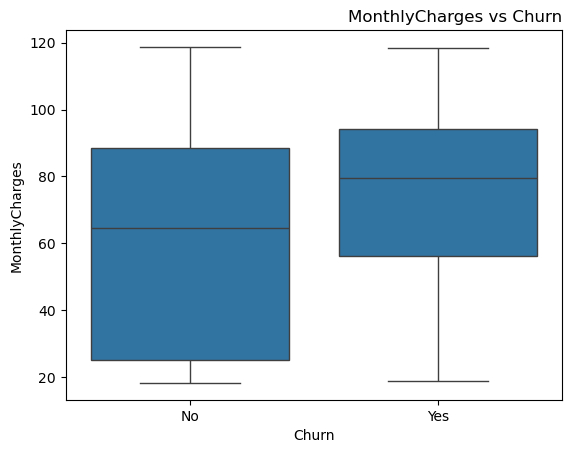

In [53]:
# MonthlyCharges by Churn
sns.boxplot(data=clean_data, y= 'MonthlyCharges', x='Churn')
plt.title("MonthlyCharges vs Churn", loc='right')
plt.show()

In [20]:
# Churn rate analysis
churn_rate = clean_data['Churn'].map({'Yes':1, 'No':0}).mean()
print(f'Overall Churn Rate: {churn_rate:.1%}')
print(clean_data.groupby('Contract')['Churn'].value_counts(normalize=True))

Overall Churn Rate: 26.6%
Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64


- As we can see month-to-month have high churn % compare to others.

In [22]:
# Export cleaned dataframe into csv
clean_data.to_csv("cleaned_telco.csv",index=False)

- Export clean dataframe into csv format for further process.

### Final Summary:
- Class imbalance in churn.
- TotalCharges needed conversion from object to float.
- SeniorCitizen is numerical but binary, we'll treat it as categorical.
- Features like Tenture, TotalCharges shows correlation.